# Assignment 3: Adult Income Prediction

- Dataset: Adult Income Dataset from the UCI Machine Learning Repository

This dataset contains various attributes of individuals, and the task is to predict whether a person earns more than $50,000 per year.

https://archive.ics.uci.edu/dataset/2/adult

## Tasks:

### 1. Data Loading and Initial Exploration:

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Adult Income dataset.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                'hours-per-week', 'native-country', 'income']

df = pd.read_csv(url, names=column_names, skipinitialspace=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [98]:
# Display basic information about the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 2. Data Preparation:

#### - This dataset has missing data that is filled with '?' where the data is missing. To better handle missing data, replace it with a null value and then drop it.

In [99]:
# Identify and handle missing values. Identify missing values.
df.isnull().sum()

# Handle missing values. Replace '?' with NaN for better handling.
import numpy as np
df = df.replace('?', np.NaN)

# Display basic info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [100]:
# Drop rows with missing values.
df = df.dropna()

# Display basic info.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 3. Feature Engineering:

#### NOTE: Before doing this task, make sure that you read the post that I wrote in the channel about Dummy Encoding. Watch the videos and check the Jupyter file to see a simple example.

In [101]:
# Convert categorical variables into a suitable format for analysis.
# Encode these columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'].

# Encode categorical variables using dummy encoding.
df_encoded = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])

# Identify the newly created dummy columns.
dummy_columns = [col for col in df_encoded.columns if '_' in col]

# Convert the dummy columns to integers.
df_encoded[dummy_columns] = df_encoded[dummy_columns].astype(int)

# Assign new df to original df.
df = df_encoded

# Display the updated DataFrame.
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### 4. Exploratory Data Analysis (EDA):

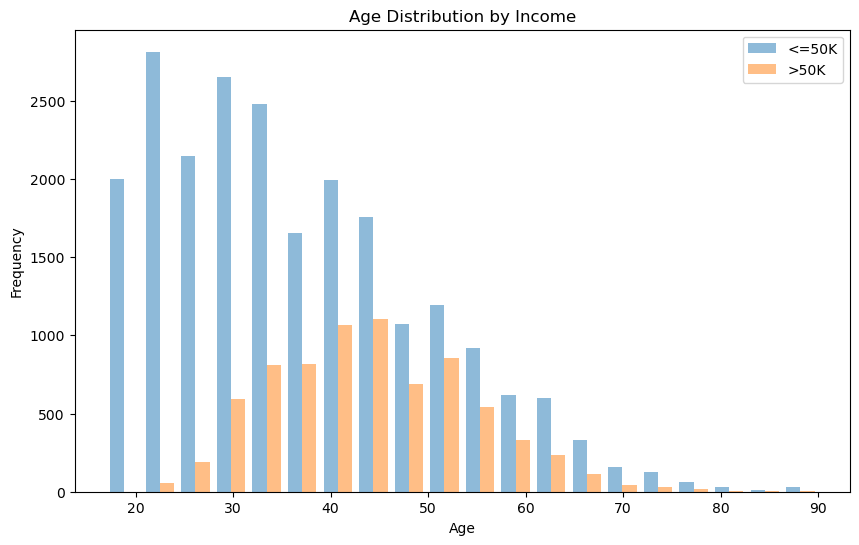

In [122]:
# Explore age distribution by income.
plt.figure(figsize=(10, 6))
plt.hist([df[df['income'] == '<=50K']['age'], df[df['income'] == '>50K']['age']], bins=20, alpha=0.5, label=['<=50K', '>50K'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Income')
plt.legend()
plt.show()

In [115]:
# Analyze the distribution of income categories.

# TODO

### 5. Model Training:

#### Note: 
1. It's a good practice to try multiple algorithms and compare their performance using appropriate evaluation metrics.
2. Your accuracy may differ from the one you see here according to your data splitting and using the random_state parameter.

In [104]:
# Import necessary libraries for model training.

# TODO


# Split the dataset into features (X) and target variable (y).

# TODO


# Split the data into training and testing sets.

# TODO

In [105]:
# Train a Logistic Regression model.

# TODO


# Make predictions.

# TODO


In [106]:
# Evaluate the performance of the model using accuracy.

# TODO

In [107]:
# Train a Decision Tree model.

# TODO


# Make predictions.

# TODO

In [108]:
# Evaluate the performance of the model using accuracy.

# TODO

In [109]:
# Train a Random Forest classifier.

# TODO


# Make predictions on the test set.

# TODO

In [110]:
# Evaluate the performance of the model using accuracy.

# TODO

In [111]:
# Train a SVM model.

# TODO


# Make predictions.

# TODO

In [112]:
# Evaluate the performance of the model using accuracy.

# TODO

### Additional Notes:

- You are encouraged to experiment with different features, algorithms, and hyperparameters to improve model performance.